<a href="https://colab.research.google.com/github/Raghad770/VGG11-13-16-19-implementation-with-Keras/blob/main/VGG19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Configuration environment
import os

os.environ['KAGGLE_USERNAME'] = "raghadsayed" # username from the json file
os.environ['KAGGLE_KEY'] = "c77af906ed5f195ca3f3b6026290e88d" # key from the json file

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!kaggle datasets download -d puneet6060/intel-image-classification

 98% 340M/346M [00:02<00:00, 154MB/s]
100% 346M/346M [00:02<00:00, 152MB/s]


In [ ]:
!unzip /content/intel-image-classification.zip

set paths of the training, test, and validation data

In [5]:
train_path='/content/seg_train/seg_train'
test_path='/content/seg_test/seg_test'
validation_path='/content/seg_train/seg_pred'

import important libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import tensorflow as tf
import os
import shutil
import glob

Data augmentation

In [7]:
img_height = 224
img_width = 224

training_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(
                                                                    rescale=1/255.0,
                                                                    validation_split=0.15)

train_generator = training_data_gen.flow_from_directory(train_path,
                                                        target_size=(img_height, img_width),
                                                        batch_size=64,
                                                        shuffle=True,
                                                        class_mode='categorical',
                                                        subset='training') # set as training data

validation_generator = training_data_gen.flow_from_directory(train_path, # same directory as training data
                                                             target_size=(img_height, img_width),
                                                             batch_size=64,
                                                             shuffle=True,
                                                             class_mode='categorical',
                                                             subset='validation') # set as validation data
 

testing_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0)

test_generator = testing_data_gen.flow_from_directory(test_path,
                                                      target_size=(img_height, img_width),
                                                      batch_size=60,
                                                      seed=0,
                                                      shuffle=False,
                                                      class_mode='categorical') 

Found 11932 images belonging to 6 classes.
Found 2102 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


represent each image with a specific numb for each different class {'buildings' -> 0, 'forest' -> 1, 'glacier' -> 2, 'mountain' -> 3, 'sea' -> 4, 'street' -> 5 }

In [8]:
train_generator.classes

array([0, 0, 0, ..., 5, 5, 5], dtype=int32)

store the matrices of all images in array "img" and their labels in array "label"

In [ ]:
img,label=next(train_generator)
print(label)

print images with their class name

[0. 1. 0. 0. 0. 0.]
1
forest


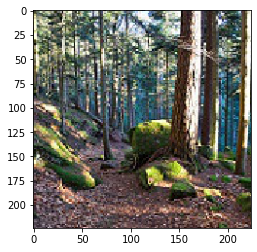

In [10]:
labels=['buildings','forest','glacier','mountain','sea','street']
image = img[1]
label = label[1]
print (label)
li=list(label)
res=li.index(1)
print(res)
print(labels[res])
plt.imshow(image)
plt.show()

0
/content/seg_train/seg_train/sea
/content/seg_train/seg_train/sea/6166.jpg
1
/content/seg_train/seg_train/mountain
/content/seg_train/seg_train/mountain/13177.jpg
2
/content/seg_train/seg_train/forest
/content/seg_train/seg_train/forest/12576.jpg
3
/content/seg_train/seg_train/buildings
/content/seg_train/seg_train/buildings/13624.jpg
4
/content/seg_train/seg_train/street
/content/seg_train/seg_train/street/3440.jpg
5
/content/seg_train/seg_train/glacier
/content/seg_train/seg_train/glacier/18638.jpg


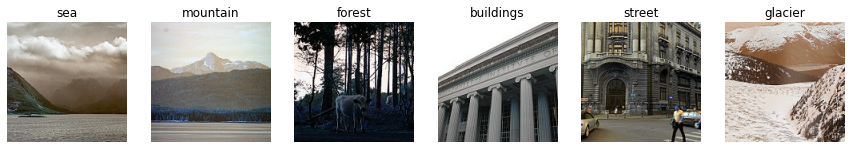

In [11]:
import cv2
%matplotlib inline
# to show images by bath form directory  
fig = plt.figure(figsize=(15,10))
columns = 6
rows = 1
fielName = train_path

for i in range(columns*rows ):
      # each loop takes a different name each file in the directory in order so first time takes mountain, street, buildings,....
      folderName = os.path.join((fielName), os.listdir(fielName)[i])
      print(i)
      print(folderName)
      img = cv2.imread(folderName+'/'+(os.listdir(folderName)[i]))
      print(folderName+'/'+(os.listdir(folderName)[i]))
      fig.add_subplot(rows, columns, i+1)
      plt.imshow(img)
      plt.axis('off')
      #to print each image with the folder name
      plt.title(os.path.basename(folderName))

plt.show()

impelemntation of VGG19 model

In [17]:
model_19 = tf.keras.models.Sequential()

model_19.add(tf.keras.layers.Conv2D(64, (3,3), input_shape=(224,224,3), activation="relu", padding="same"))
model_19.add(tf.keras.layers.Conv2D(64, (3,3), activation="relu", padding="same"))
model_19.add(tf.keras.layers.MaxPool2D((2,2), (2,2)))

model_19.add(tf.keras.layers.Conv2D(128, (3,3), activation="relu", padding="same"))
model_19.add(tf.keras.layers.Conv2D(128, (3,3), activation="relu", padding="same"))
model_19.add(tf.keras.layers.MaxPool2D((2,2), (2,2)))

model_19.add(tf.keras.layers.Conv2D(256, (3,3), activation="relu", padding="same"))
model_19.add(tf.keras.layers.Conv2D(256, (3,3), activation="relu", padding="same"))
model_19.add(tf.keras.layers.Conv2D(256, (3,3), activation="relu", padding="same"))
model_19.add(tf.keras.layers.Conv2D(256, (3,3), activation="relu", padding="same"))
model_19.add(tf.keras.layers.MaxPool2D((2,2), (2,2)))

model_19.add(tf.keras.layers.Conv2D(512, (3,3), activation="relu", padding="same"))
model_19.add(tf.keras.layers.Conv2D(512, (3,3), activation="relu", padding="same"))
model_19.add(tf.keras.layers.Conv2D(512, (3,3), activation="relu", padding="same"))
model_19.add(tf.keras.layers.Conv2D(512, (3,3), activation="relu", padding="same"))
model_19.add(tf.keras.layers.MaxPool2D((2,2), (2,2)))

model_19.add(tf.keras.layers.Conv2D(512, (3,3), activation="relu", padding="same"))
model_19.add(tf.keras.layers.Conv2D(512, (3,3), activation="relu", padding="same"))
model_19.add(tf.keras.layers.Conv2D(512, (3,3), activation="relu", padding="same"))
model_19.add(tf.keras.layers.Conv2D(512, (3,3), activation="relu", padding="same"))
model_19.add(tf.keras.layers.Conv2D(512, (3,3), activation="relu", padding="same"))
model_19.add(tf.keras.layers.Conv2D(512, (3,3), activation="relu", padding="same"))
model_19.add(tf.keras.layers.MaxPool2D((2,2), (2,2)))

model_19.add(tf.keras.layers.Flatten())

model_19.add(tf.keras.layers.Dense(4096, activation="relu"))
model_19.add(tf.keras.layers.Dropout(0.5))
model_19.add(tf.keras.layers.Dense(4096, activation="relu"))

model_19.add(tf.keras.layers.Dense(6, activation="softmax"))

In [18]:
model_19.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 56, 56, 256)      

In [21]:
model_19.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),loss='categorical_crossentropy',metrics=['accuracy'])
history_19=model_19.fit(train_generator,validation_data=validation_generator, epochs=10,verbose=1)

Epoch 1/10
187/187 [==============================] - 435s 2s/step - loss: 1.4629 - accuracy: 0.3707 - val_loss: 1.1250 - val_accuracy: 0.5362
Epoch 2/10
187/187 [==============================] - 358s 2s/step - loss: 0.9179 - accuracy: 0.6190 - val_loss: 0.8570 - val_accuracy: 0.6613
Epoch 3/10
187/187 [==============================] - 358s 2s/step - loss: 0.7637 - accuracy: 0.6950 - val_loss: 0.7139 - val_accuracy: 0.7369
Epoch 4/10
187/187 [==============================] - 358s 2s/step - loss: 0.6721 - accuracy: 0.7422 - val_loss: 0.6157 - val_accuracy: 0.7674
Epoch 5/10
187/187 [==============================] - 358s 2s/step - loss: 0.5842 - accuracy: 0.7808 - val_loss: 0.6268 - val_accuracy: 0.7707
Epoch 6/10
187/187 [==============================] - 358s 2s/step - loss: 0.5345 - accuracy: 0.8045 - val_loss: 0.5287 - val_accuracy: 0.7997
Epoch 7/10
187/187 [==============================] - 358s 2s/step - loss: 0.4627 - accuracy: 0.8312 - val_loss: 0.5421 - val_accuracy: 0.8145

In [22]:
import pickle
with open('/content/gdrive/MyDrive/Colab Notebooks/VGG16/trainHistoryDict_19', 'wb') as file_pi:
        pickle.dump(history_19.history, file_pi)

model_19.save('/content/gdrive/MyDrive/Colab Notebooks/VGG16/my_model_19')

INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/Colab Notebooks/VGG16/my_model_19/assets
